# OESON - Data Science Internship
## Mentor: Manisha
## Student: Julián Andrés Salazar 
## Project 1: Data Analysis and Visualization with Python

### Task 1: Data Generation

1. **Generate a synthetic dataset:**
   - Use Numpy to create a dataset with 1000 samples.
   - The dataset should include the following columns: Age, Height, Weight, Gender, and Income.
     - **Age:** Normally distributed with a mean of 35 and a standard deviation of 10.
     - **Height:** Normally distributed with a mean of 170 cm and a standard deviation of 15 cm.
     - **Weight:** Normally distributed with a mean of 70 kg and a standard deviation of 10 kg.
     - **Gender:** Randomly assigned with 50% probability for 'Male' and 'Female'.
     - **Income:** Normally distributed with a mean of 50,000 and a standard deviation of 15,000..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility

np.random.seed(1)

# Generate variable Age, with 1000 observations, normally distributed,
#  with mean 35 and standard deviation of 10

Age=np.random.normal(loc=35, scale=10, size=1000)

# Generate variable Age, with 1000 observations, normally distributed,
#  with mean 170 and standard deviation of 15

Height=np.random.normal(loc=170, scale=15, size=1000)

# Generate variable Weight, with 1000 observations, normally distributed,
#  with mean 70 and standard deviation of 10

Weight=np.random.normal(loc=70, scale=10, size=1000)

# Generate variable Gender, with 1000 observations, Randomly assigned 
# with 50% probability for 'Male' and 'Female'.,

Gender = np.random.choice(['Male', 'Female'], size=1000, p=[0.5, 0.5])

# Generate variable Income, with 1000 observations, normally distributed,
#  with mean 50000 and standard deviation of 15000

Income=np.random.normal(loc=50000, scale=15000, size=1000)


# Here, I use the created variables to establish the dataset
dataset = pd.DataFrame({
    'Age': Age,
    'Height': Height,
    'Weight': Weight,
    'Gender': Gender,
    'Income': Income
})

dataset.head(5)

Age      Height     Weight  Gender        Income
0  51.243454  167.701458  74.895166  Female  38401.692377
1  28.882436  133.512372  72.387959  Female  61257.837180
2  29.718282  177.619765  65.518882  Female  40946.672489
3  24.270314  165.139515  63.892050    Male  61303.586983
4  43.654076  147.333851  49.700549  Female  50400.633879

### Task 2: Descriptive Statistics

2. **Calculate basic descriptive statistics:**
   - Calculate mean, median, standard deviation, and variance for Age, Height, Weight, and Income
  
3. **Calculate the mode for Gender**

In [2]:
# Basic descriptive statistics

Basic_Descriptive_Statistics=(
    # Next line specifies that I only want numeric variables
    dataset.select_dtypes(include=[np.number])
    # Next line uses describe to get the descriptive statistics of dataset
    .describe()  # Could also do .describe(include=[np.number])
    # Next line specifies the "rows" with .loc that I want to keep from describe 
    # function
    .loc[['mean', '50%', 'std']]
    #Next line renames the statistics
    .rename(index={"mean":"Mean", '50%': 'Median', 'std': 'Standard Deviation'})
)

# Next line adds a new raw called Variabce

Basic_Descriptive_Statistics.loc["Variance"]=(
    #Next line specifies that I only want numeric variables
    dataset.select_dtypes(include=[np.number])
    #Next line specifies that I want to get the variance
    .var()
)

Basic_Descriptive_Statistics.head()

Age      Height     Weight        Income
Mean                35.388125  170.409882  69.778314  5.105524e+04
Median              35.412926  170.469703  69.850044  5.120237e+04
Standard Deviation   9.814950   15.458293   9.721093  1.542189e+04
Variance            96.333244  238.958807  94.499650  2.378347e+08

In [3]:
# Calculate mode for gender 
Mode_for_gender = dataset['Gender'].mode()
Mode_for_gender.head()

# In this case, both male and female are equally distributed
# This is because they are asigned randomly with equal probability of 50% each one


0    Female
1      Male
Name: Gender, dtype: object

### Task 3: Data Visualization 

4. **Visualize the distributions:**
   - Plot histograms for Age, Height, Weight, and Income.
   - Use Seaborn to create KDE plots for Age, Height, Weight, and Income.
  
5. **Boxplots to identify outliers:**
   - Create boxplots for Age, Height, Weight, and Income
  

C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julia\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

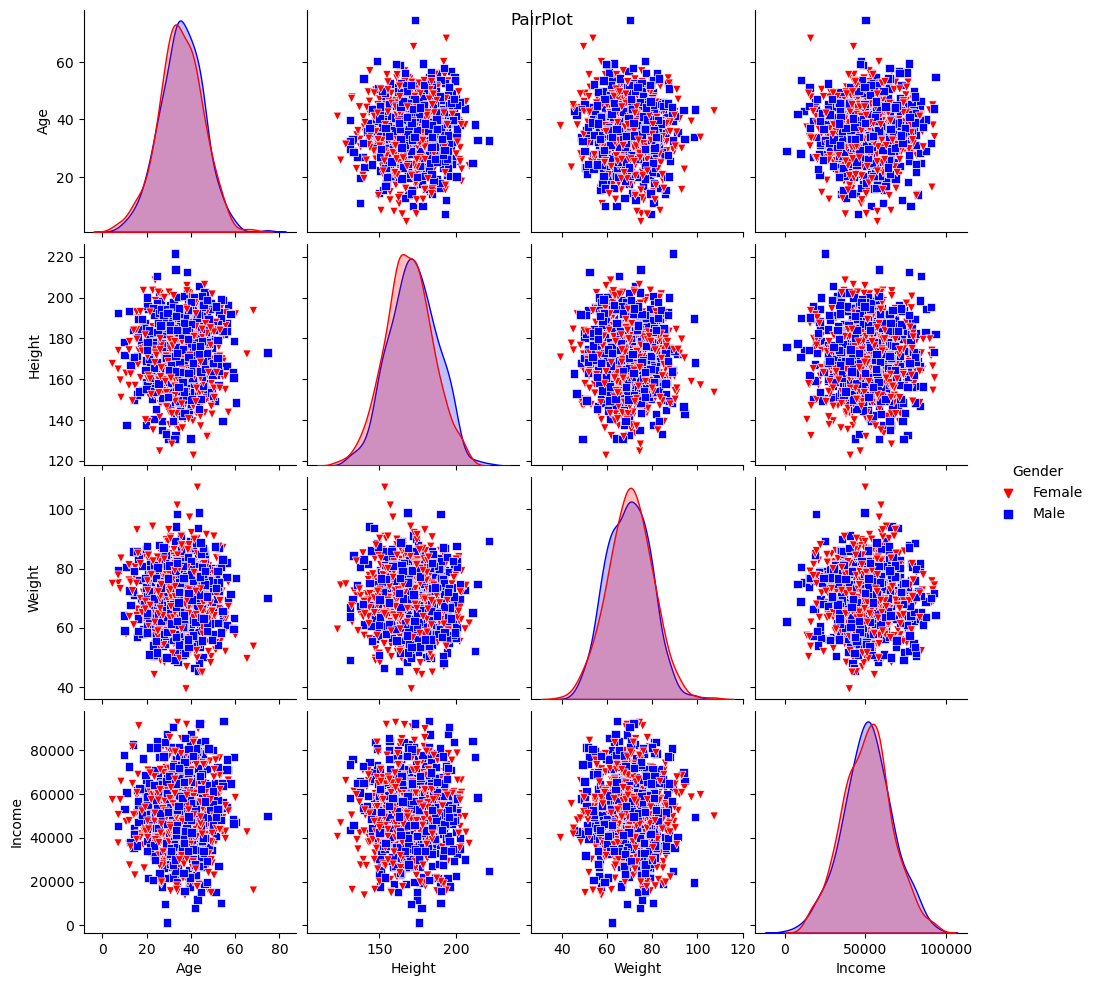

In [4]:
import seaborn as sns

markers={"Female": "v",
        "Male": "s"}

colours={"Female": "red",
        "Male": "blue"}

sns.pairplot(dataset,
             diag_kind='kde',
             hue="Gender",
             markers=markers,
             palette=colours,
            )
plt.suptitle('PairPlot')
plt.show()

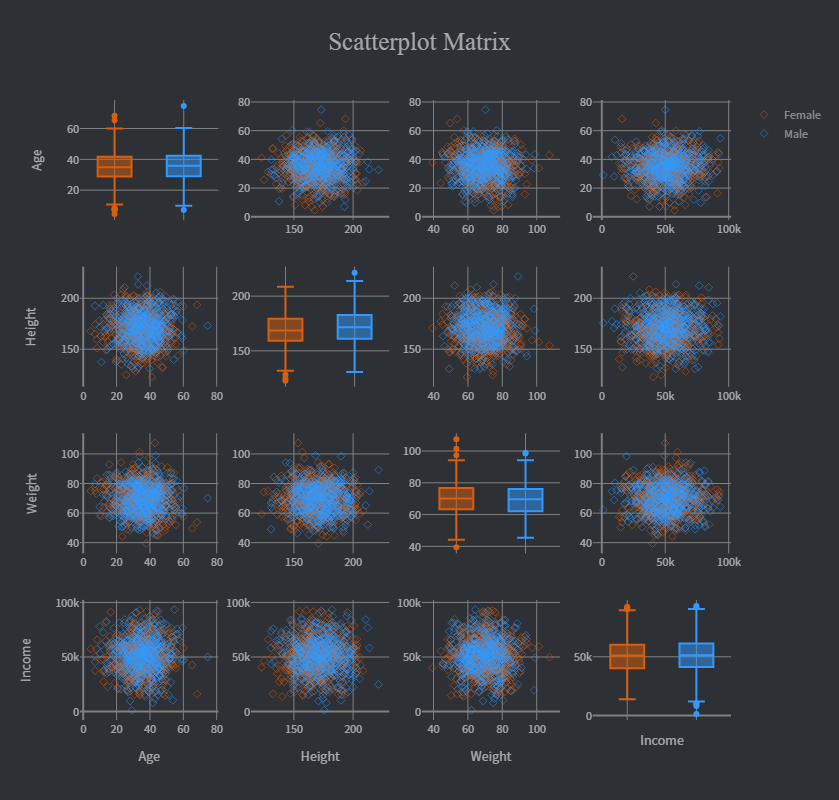

In [5]:
from plotly import figure_factory

# Create the scatter plot matrix
fig = figure_factory.create_scatterplotmatrix(
    dataset,
    index='Gender',
    diag='box',
    colormap={'Female': '#d95f0e', 'Male': (0.2, 0.6, 1)},
    marker=dict(
        symbol='diamond-open',
        opacity=0.5,
    ),
    height=800,
    width=800
)

# Remove lines from the plot
fig.update_xaxes(color='#a5a7ab', zerolinecolor="gray", gridcolor="gray")
fig.update_yaxes(color='#a5a7ab', zerolinecolor="gray", gridcolor="gray")

fig.update_layout(
    plot_bgcolor='#2d3035', 
    paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Merriweather"),
    title_x=0.5,
    font=dict(color='#8a8d93', family="Source Sans Pro")
)

# Show the figure
fig.show()



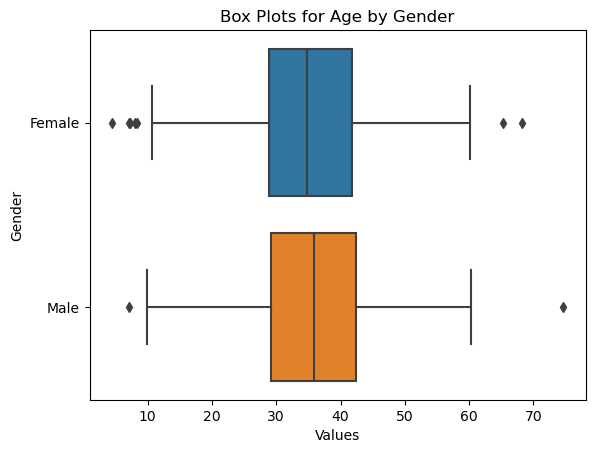

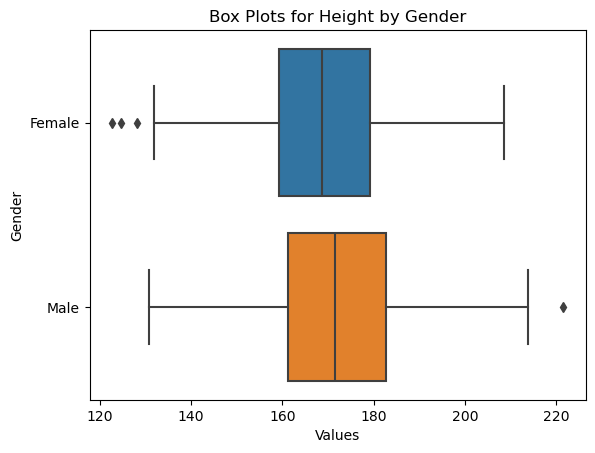

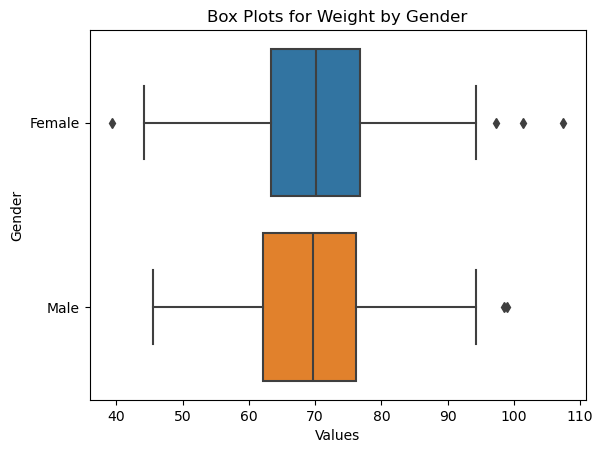

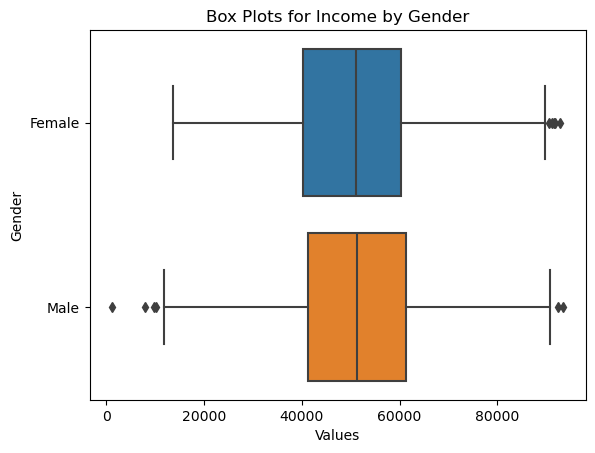

In [6]:
#Graph Analysis : Box Plot

for c in dataset.select_dtypes(include=['number']).columns:
    sns.boxplot(y=dataset["Gender"], x=dataset[c])
    plt.title(f'Box Plots for {c} by Gender')
    plt.xlabel('Values')
    plt.ylabel('Gender')
    plt.show()


### Task 4: Correlation Analysis

6. **Calculate Correlation**
   - Calculate the Pearson correlation coefficient between Age, Height, Weight, and Income
  
7. **Visualize the correlation matrix**
   - Use a heatmap to visualize the correlation matrix

In [7]:
correlation_matrix=(
    dataset.select_dtypes(include=['number'])
    .corr(method="pearson")
)

correlation_matrix.head()

Age    Height    Weight    Income
Age     1.000000  0.021857 -0.050676  0.014512
Height  0.021857  1.000000 -0.032072  0.013802
Weight -0.050676 -0.032072  1.000000 -0.009746
Income  0.014512  0.013802 -0.009746  1.000000

<Axes: >

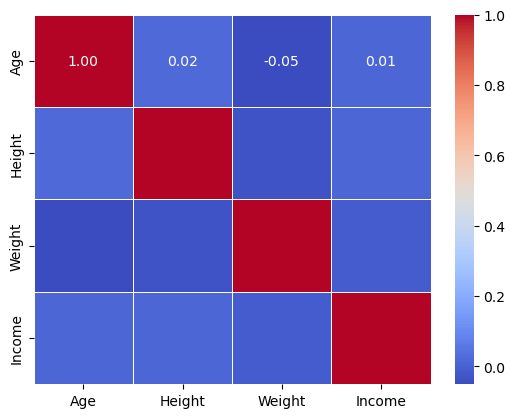

In [8]:
sns.heatmap(correlation_matrix, 
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cmap='coolwarm')

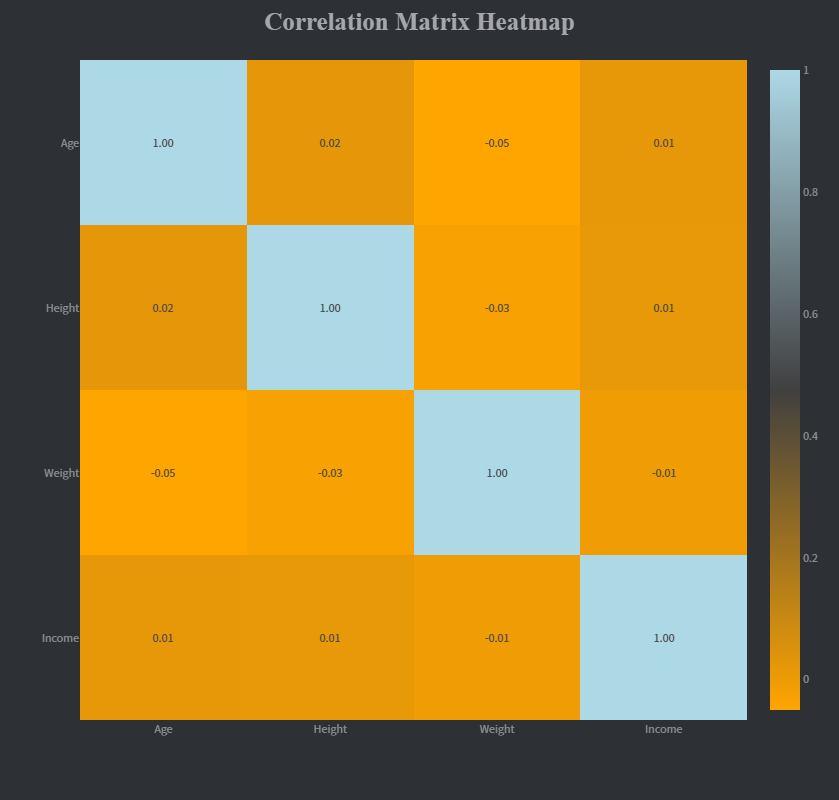

In [9]:
import plotly.express as px

custom_color_scale = [
    [0.0, "orange"],   # Start with orange
    [0.5, "#404040"],  # Dark gray as middle point
    [1.0, "lightblue"] # End with light blue
]

fig = px.imshow(correlation_matrix,
                color_continuous_scale=custom_color_scale,
                text_auto=True,
                aspect="auto")

fig.update_layout(
    width=800,  # width in pixels
    height=800,  # height in pixels
    title="<b>Correlation Matrix Heatmap</b>",
    plot_bgcolor='#2d3035', 
    paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab', family="Merriweather"),
    title_x=0.5,
    font=dict(color='#8a8d93', family="Source Sans Pro")
)

fig.update_traces(
    texttemplate="%{z:.2f}",  # Format text to two decimal places
    textfont=dict(size=12)  # Adjust font size as needed
    )

#fig.update_xaxes(side="top")

fig.show()

### Task 5: Inferential Statistics 

8. **Hypothesis Testing:**
   - Perform a t-test to see if there is a significant difference in income between Male and  Female

In [10]:
import pandas as pd 
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
#ttes_ind stands for two sample independent test
# chi2_contingency stands for contingency (Table form, how the results are affecting each other treatment)
# f_oneway statns for f statistic and one way anova test

#### T-Tests
- Ho: There is no significant difference on the "{variable}" of groups A and B.
- H1: There is significant difference on the "{variable}" of groups A and B.

In [11]:
Income_women=dataset[dataset["Gender"]=="Female"]["Income"]
Income_men=dataset[dataset["Gender"]=="Male"]["Income"]

# Perform Independent Sample T-Test

t_stats=ttest_ind(Income_women, Income_men)
print(t_stats)

TtestResult(statistic=-0.4626140045800206, pvalue=0.6437419134123437, df=998.0)


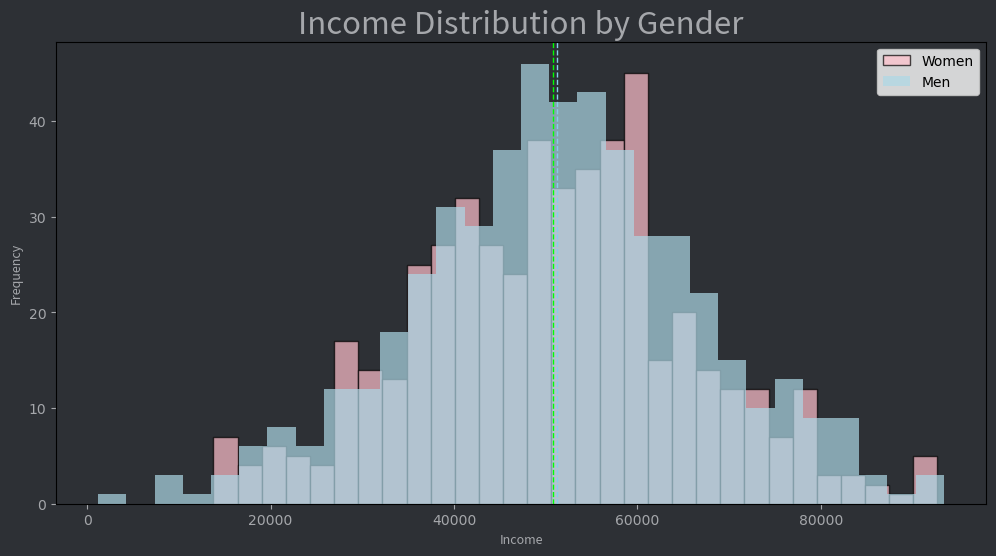

In [12]:
# Plot the distributions of thplt.hist(Income_women, bins=30, alpha=0.7, label='Women', color='pink')
plt.figure(figsize=(12, 6))
plt.hist(Income_women, bins=30, alpha=0.7, label='Women', color='pink', edgecolor="black")
plt.hist(Income_men, bins=30, alpha=0.7, label='Men', color='lightblue')
plt.axvline(np.mean(Income_women), color='lime', linestyle='dashed', linewidth=1)
plt.axvline(np.mean(Income_men), color='skyblue', linestyle='dashed', linewidth=1)
plt.legend()
plt.title('Income Distribution by Gender', fontsize=25, color='#a5a7ab', family="Source Sans Pro")
plt.xlabel('Income', color='#a5a7ab', family="Source Sans Pro")
plt.ylabel('Frequency', color='#a5a7ab', family="Source Sans Pro")
plt.tick_params(axis='x', colors='#a5a7ab')
plt.tick_params(axis='y', colors='#a5a7ab')
plt.rcParams['axes.edgecolor'] = '#a5a7ab'
plt.gca().set_facecolor('#2d3035')
plt.gcf().set_facecolor('#2d3035')
plt.show()


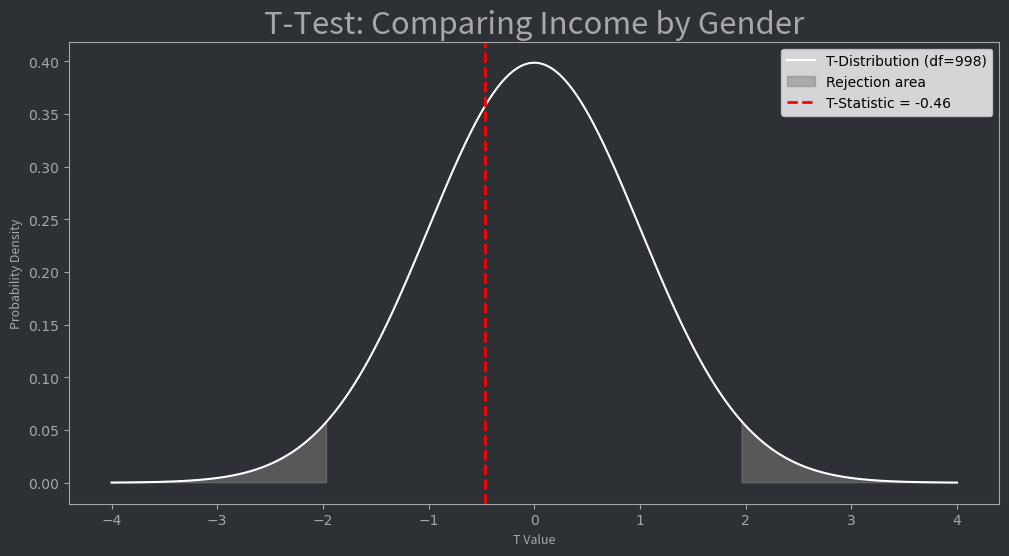

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

df = len(Income_women) + len(Income_men) - 2

x = np.linspace(-4, 4, 1000)

# Calculate the t-distribution PDF
y = t.pdf(x, df)

# Critical value for a two-tailed test with 95% confidence
critical_value = t.ppf(0.975, df)

# t-statistic
t_statistic =-0.4626140045800206 

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='T-Distribution (df={})'.format(df), color='white')
plt.fill_between(x, y, where=(x <= -critical_value) | (x >= critical_value), color='grey', alpha=0.5, label="Rejection area")
plt.axvline(t_statistic, color='red', linestyle='dashed', linewidth=2, label=f'T-Statistic = {t_statistic:.2f}')
plt.legend()
plt.title('T-Test: Comparing Income by Gender', fontsize=25, color='#a5a7ab', family="Source Sans Pro")
plt.xlabel('T Value', color='#a5a7ab', family="Source Sans Pro")
plt.ylabel('Probability Density', color='#a5a7ab', family="Source Sans Pro")
plt.gca().set_facecolor('#2d3035')
plt.gcf().set_facecolor('#2d3035')
plt.tick_params(axis='x', colors='#a5a7ab')
plt.tick_params(axis='y', colors='#a5a7ab')
plt.rcParams['axes.edgecolor'] = '#a5a7ab'
plt.show()
